In [1]:
import collections

import nltk
import numpy as np
from sklearn.metrics import pairwise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tqdm.notebook import tqdm

from pan20 import fake, util
from pan20.util import text
from pan20.util.lexicons import wordnet_affect

In [2]:
df = fake.load()

In [36]:
def plot_mu_std(pdf, attr, group=True, std=True):
    if group:
        mdf = pdf.groupby(['author', 'label']).mean().reset_index()
    else:
        mdf = pdf
    sns.distplot(mdf[mdf.label == 0][attr], label='Not Spreader')
    sns.distplot(mdf[mdf.label == 1][attr], label='Spreader')
    plt.legend()
    plt.title(f'Distributions of means of {attr}')
    plt.show()
    if std:
        if group:
            sdf = pdf.groupby(['author', 'label']).std().reset_index()
        else:
            sdf = pdf
        sns.distplot(sdf[sdf.label == 0][attr], label='Not Spreader')
        sns.distplot(sdf[sdf.label == 1][attr], label='Spreader')
        plt.legend()
        plt.title(f'Distributions of stds of {attr}')
        plt.show()

In [14]:
wna = wordnet_affect.WordNetAffect()

In [48]:
tokss = []
anger = []
n_anger = []
n_toks = []
with tqdm(total=len(df)) as pbar:
    for _, x in df.iterrows():
        toks = text.tokenize(x.tweet)
        tokss.append(toks)
        n = len(toks)
        m = sum(1 for t in toks if wna.is_in('anger', t))
        anger.append(m / n)
        n_toks.append(n)
        n_anger.append(m)
        pbar.update()
df['anger'] = anger
df['toks'] = tokss
df['n_toks'] = n_toks
df['n_anger'] = n_anger

In [50]:
b = df.groupby(['author', 'label']).mean().reset_index()
b['anger2'] = b.n_anger / b.n_toks
b.head(20)

,author,label,anger,n_toks,n_anger,anger2
0,06ct0t68y1acizh9eow3g5rhancrppr8,1,0.001752,24.37,0.04,0.001641
1,071nxc49ihpd0jlfmvn2lghtayy3b5n9,0,0.003367,18.18,0.05,0.002750
2,09py5qescynpnnckmzueqzr2y49moh1o,0,0.000931,20.81,0.02,0.000961
3,0dwovd7nj6yg9m795ng2c629me0ccmrh,0,0.002675,24.73,0.06,0.002426
4,0ibi364m7i7l01xi4xqafyathrmrrnll,1,0.002664,26.99,0.07,0.002594
5,0s308xu8rhhuqlj0jbh49z0kdx5sr2b9,1,0.001000,16.74,0.01,0.000597
6,11d9lz40vkh06i6tp2mubr1qbohm8biv,1,0.002595,23.19,0.07,0.003019
7,14ka43f4ho6puh4iyhrfzsbrdpy5yixi,0,0.002839,24.61,0.07,0.002844
8,18n59cv9zps9sm601zu95z680wma6cvw,0,0.000769,14.90,0.01,0.000671
9,1jjc4qfpeeffirv6pnq9aulrlk2fgl3k,1,0.002992,19.95,0.06,0.003008


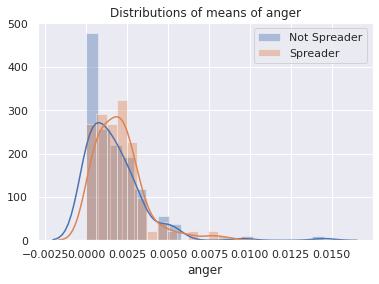

In [53]:
plot_mu_std(b, 'anger', False, False)

So we can't get any closer by just taking the average over all tweets per user instead of tweets then users.

## Comparison

In [3]:
dfo = pd.read_csv('data/fake/liwc_out.csv')
dfo.head()

,Filename,Segment,WC,Analytic,Clout,Authentic,Tone,function,pronoun,ppron,...,anx,anger,sad,cogproc,insight,cause,discrep,tentat,certain,differ
0,0.txt,1,6,93.26,4.80,98.01,99.00,33.33,16.67,16.67,...,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0
1,1.txt,1,7,93.26,7.67,89.63,99.00,28.57,14.29,14.29,...,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0
2,10.txt,1,12,93.26,79.76,1.79,25.77,0.00,0.00,0.00,...,0.0,0.0,0.0,8.33,0.00,8.33,0.0,0.0,0.0,0.0
3,100.txt,1,19,99.00,99.00,19.27,25.77,21.05,0.00,0.00,...,0.0,0.0,0.0,5.26,5.26,0.00,0.0,0.0,0.0,0.0
4,1000.txt,1,16,93.26,96.95,1.00,25.77,25.00,6.25,6.25,...,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0


In [4]:
dfo['ix'] = dfo.Filename.apply(lambda x: int(x.split('.')[0]))
dfo.drop(columns=['Filename'], inplace=True)

In [8]:
df['ix'] = list(range(len(df)))
df.head()

,author,tweet,label,ix
0,f4zgi7ym7829iqld6x77q6mh30s0rf86,"Thanks ""ArtistRack"" For Following Me !!! #URL#",0,0
1,f4zgi7ym7829iqld6x77q6mh30s0rf86,"Thanks ""Sally Mansfield"" For Following Me !!! ...",0,1
2,f4zgi7ym7829iqld6x77q6mh30s0rf86,"Thanks ""Simão"" For Following Me !!! #URL#",0,2
3,f4zgi7ym7829iqld6x77q6mh30s0rf86,"RT BBCWorld ""Danish prince refuses to be burie...",0,3
4,f4zgi7ym7829iqld6x77q6mh30s0rf86,"RT Reuters ""Bieber says he's 'never going to b...",0,4


In [10]:
df.set_index('ix', inplace=True)
dfo.set_index('ix', inplace=True)
df = df.join(dfo, on='ix')

In [12]:
dfa = df[df.anger > 0]

In [13]:
for _, x in dfa.iterrows():
    print('-' * 8)
    print(x.tweet)

--------
RT nytimes "Foxes and other furry creatures could be Lyme disease's worst enemy #URL#"
--------
RT Reuters "Cyber expert who stopped 'WannaCry' attack arrested in U.S. on hacking charges #URL# #URL#"
--------
RT BBCWorld "Ivory destroyed in New York's Central Park #URL#"
--------
RT Reuters "Russia: Pence Balkans comments expose Washington's Cold War ideology #URL# #URL#"
--------
$308 Million Abacha Loot!!! America Blows Hot, Threatens Buhari’s Federal Government #URL#
--------
Buhari Gets Angry, Totally Condemns The Killing Of Suspected Bandits, Warns Nigerians #URL#
--------
RT #USER#: The Governor Of Delta State, #USER#, Has Condemned The Attacks By Suspected Herdsmen, In Avwon, Agadama, Ohoror, And Ot…
--------
RT #USER#: Ex-#HASHTAG# Housemate, T-Boss, Cries Bitterly On Instagram Live Video, Over Hate Comments Directed Towards Her Child, On…
--------
RT #USER#: Boko Haram Leader, Shekau, Threatens To Kill Buhari, If He Ever Returns To Borno State #URL#
--------
RT #USER#

--------
#USER# #USER# Murdered by Trump and McConnell...😠
--------
#USER# #USER# God Bless you, Treat Williams! You nailed Orange Hitler right on his piss-colored,… #URL#
--------
#USER# "Shit storm in a dumpster fire!"  Sound familiar?🤗 #URL#
--------
#USER# Well, the "Woman of Mystery" was rather insulting to the media, hides in the Lincoln Bedroom like a teena… #URL#
--------
#USER# That sucks. He's a good guy. Reminds me of what Buckner went through at Pittsburgh!🤔
--------
Defense rests without Weinstein testifying at rape trial - The Associated Press #URL# #URL#
--------
Three-round 2020 NFL Mock Draft: Cowboys land tight end, Patriots add playmakers, three QBs taken on Day 2 - CBS Sp… #URL#
--------
Our best weapons against cancer are not magic bullets - #URL# #URL# #URL#
--------
What you DIDN'T see in the Survivor: Winners at War season premiere - Entertainment Weekly News… #URL#
--------
Steve Mills fired amid another brutal Knicks season - New York Post #URL# #URL#
--------

--------
How to get your hands on 'God of War' and limited edition merchandise #URL#
--------
Mark Ruffalo shares the time Disney yelled at him for 'Thor: Ragnarok' spoilers #URL#
--------
Mark Ruffalo shares the time Disney yelled at him for 'Thor: Ragnarok' spoilers #URL#
--------
Google's Gmail gets self-destruct option ahead of GDPR #URL#
--------
You might enjoy 'Infinity War' more if you're not a hardcore Marvel fan #URL#
--------
'Avengers: Infinity War' cast play a hilariously awkward guessing game #URL#
--------
If invited, #HASHTAG# must send troops to #HASHTAG#  India’s national interest lies in formulating a strategy jointly wit… #URL#
--------
RT #USER#: The worst human rights abuses are continued in Indian Occupied #HASHTAG#, which ranges from mass killings, enforced disa…
--------
RT #USER#: Modi's police brutally assaulting students studying inside the Jamia Milia Islamia university library in Delhi! This happens…
--------
RT #USER#: This Sikh Man has sold his flat to s

In [ ]:
missing = [
    'enemy',
    'attack',
    'destroy',
    'charge',  # ?
    'expose',  # ?
    'threaten',
    
]

In [19]:
wna.is_in('anger', 'attack')

False

## Analysis of Glove Vectors

In [3]:
counts = collections.Counter()
with tqdm(total=len(df)) as pbar:
    for _, x in df.iterrows():
        counts.update(text.tokenize(x.tweet))
        pbar.update()

In [4]:
word_dict = util.IxDict(counts.keys())

In [5]:
embeddings = np.random.normal(size=(len(word_dict), 200))\
    .astype('float32', copy=False)
with open('/home/hanshan/dev/glove/glove.twitter.27B.200d.txt', 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        s = line.split()
        if len(s) > 301:  # a hack I have seemed to require for GloVe 840B
            s = [s[0]] + s[-200:]
            assert len(s) == 201
        if s[0] in word_dict.keys():
            embeddings[word_dict[s[0]], :] = np.asarray(s[1:])

In [6]:
def get_vec(word, expand=0):
    word_ix = word_dict[word]
    vec = embeddings[word_ix, :]
    vec = np.expand_dims(vec, axis=expand)
    return vec

In [20]:
def nearest_k(words, k=100):
    sims = []
    for word in words:
        pbar.set_description(word)
        vec = get_vec(word)
        word_sims = pairwise.cosine_similarity(embeddings, vec) # (n * 1)
        sims.append(sims)
    print('a')
    sims = np.concatenate(sims, axis=1)
    print('b')
    scores = np.mean(sums, axis=1)
    print('c')
    ixs = np.argsort(sims, 0)[-k:]
    print('d')
    raise Exception
    nearest = []
    for i in range(k):
        ix = int(ixs[i, 0])
        word = word_dict[ix]
        dist = sims[ix]
        print(f'{ix}\t{word}\t{dist}')
        nearest.append({
            'k': i + 1,
            'word': word,
            'dist': dist,
        })
    return pd.DataFrame(nearest)

In [ ]:
n = nearest_k(['anger', 'attack'], 100)

In [64]:
n

,k,word,dist
0,0,laugh,[23.197605]
1,1,my,[23.201782]
2,2,stupidity,[23.207039]
3,3,trusting,[23.21714]
4,4,intense,[23.285244]
...,...,...,...
95,95,feelings,[31.712944]
96,96,emotions,[32.15365]
97,97,hatred,[32.616707]
98,98,frustration,[32.82025]
